In [1]:
import os

import numpy as np

import shutil
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
rootdir= 'C:/Users/Hp/Downloads/CroppedYale' #path of the original folder

classes = ['yaleB01' , 
               'yaleB02'  , 
               'yaleB03' , 
               'yaleB04' , 
               'yaleB05'  , 
               'yaleB06'  , 
               'yaleB07'  , 
               'yaleB08'  , 
               'yaleB09'  , 
               'yaleB10' , 
               'yaleB11' , 
               'yaleB12' , 
               'yaleB13' , 
               'yaleB15' , 
               'yaleB16' , 
               'yaleB17' , 
               'yaleB18' , 
               'yaleB19' , 
               'yaleB20' , 
               'yaleB21' , 
               'yaleB22' , 
               'yaleB23' , 
               'yaleB24' , 
               'yaleB25' , 
               'yaleB26' , 
               'yaleB27' , 
               'yaleB28' , 
               'yaleB29' , 
               'yaleB30' , 
               'yaleB31' , 
               'yaleB32' , 
               'yaleB33' , 
               'yaleB34' , 
               'yaleB35' , 
               'yaleB36' , 
               'yaleB37' , 
               'yaleB38' ,
               'yaleB39']

In [233]:
for i in classes:                           #for loop to split the whole folder to train and test
    os.makedirs(rootdir +'/train/' + i)
    os.makedirs(rootdir +'/test/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)                      
    np.random.shuffle(allFileNames)

    test_ratio = 0.2

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/test/' + i)

print(train_FileNames)


['C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-060E+20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+020E-40.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+070E+00.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+010E-20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+000E+20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+110E+65.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00.info', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-070E+45.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+120E+00.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-070E+00.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-035E-20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-110E+40.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+010E+00.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+130E+20.jpg', 'C:/Users/Hp/Downloads/Crop

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [4]:
train = ImageDataGenerator(rescale = 1/225)        #generate image / batches with real dataaugmentation
validation = ImageDataGenerator(rescale = 1/225)

In [32]:
training_set = train.flow_from_directory('C:/Users/Hp/Downloads/CroppedYale/train',    #when clasess splitet ,put local dirct,
                                                                                        #real target size
                                                 target_size = (192,168),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1943 images belonging to 38 classes.


In [6]:
test_set = validation.flow_from_directory('C:/Users/Hp/Downloads/CroppedYale/test',   #the same with testfolder
                                            target_size = (192,168),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 506 images belonging to 38 classes.


In [7]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D ,MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [8]:
input_shape = (192, 168, 3)                                #model CNN 
num_classes = 38

model = Sequential()   
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 168, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 168, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 84, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 96, 84, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 84, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 84, 64)        36928     
                                                        

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
model_fit = model.fit(training_set , 
                     #steps_per_epoch = 3 ,
                     epochs = 15 ,
                     validation_data = test_set)

Epoch 1/15
61/61 [==============================] - 180s 3s/step - loss: 3.6922 - accuracy: 0.0257 - val_loss: 3.6359 - val_accuracy: 0.0395
Epoch 2/15
61/61 [==============================] - 182s 3s/step - loss: 3.5524 - accuracy: 0.0566 - val_loss: 2.6950 - val_accuracy: 0.3182
Epoch 3/15
61/61 [==============================] - 181s 3s/step - loss: 1.7132 - accuracy: 0.5275 - val_loss: 0.3121 - val_accuracy: 0.9565
Epoch 4/15
61/61 [==============================] - 182s 3s/step - loss: 0.5432 - accuracy: 0.8446 - val_loss: 0.1147 - val_accuracy: 0.9802
Epoch 5/15
61/61 [==============================] - 179s 3s/step - loss: 0.3345 - accuracy: 0.8981 - val_loss: 0.1084 - val_accuracy: 0.9802
Epoch 6/15
61/61 [==============================] - 179s 3s/step - loss: 0.2151 - accuracy: 0.9362 - val_loss: 0.1011 - val_accuracy: 0.9822
Epoch 7/15
61/61 [==============================] - 181s 3s/step - loss: 0.1751 - accuracy: 0.9496 - val_loss: 0.1249 - val_accuracy: 0.9802
Epoch 8/15
61

In [13]:
train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)
print('Train_acc: %.3f , Test_acc: %.3f' %(train_acc ,test_acc))

C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/3825266299.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/3825266299.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)


Train_acc: 1.000 , Test_acc: 0.980


In [14]:
train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)
print('train_loss  %.3f, validation_loss: %.3f' %(train_loss ,validation_loss))

C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/923909745.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/923909745.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)


train_loss  0.016, validation_loss: 0.148


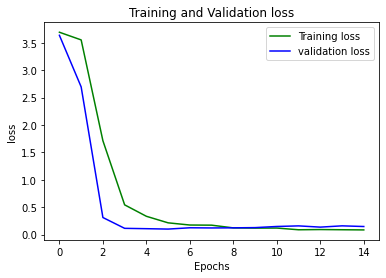

In [15]:
loss_train =model_fit.history['loss']
loss_val =  model_fit.history['val_loss']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

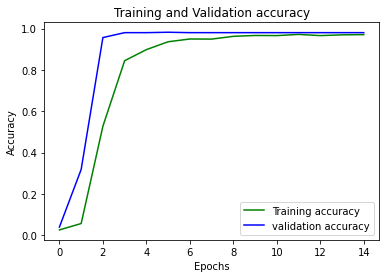

In [19]:
acc_train = model_fit.history['accuracy']
acc_val = model_fit.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#dataAugmentation

In [22]:
import keras
from tensorflow.keras import layers                     # func augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(192, 
                                                              168,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [24]:
num_classes = 38
input_shape = (192, 168, 3)

data_augmentation,
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
              
model_fit = model.fit(training_set , 
                     #steps_per_epoch = 3 ,
                     epochs = 15 ,
                     validation_data = test_set)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 192, 168, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 192, 168, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 96, 84, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 96, 84, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 84, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 96, 84, 64)        36928     
                                                      

In [25]:
train_loss1 , train_acc1 = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss1, test_acc1 = model.evaluate_generator(test_set , steps =16)
print('train_acc: %.3f , test_acc: %.3f' %(train_acc1 ,test_acc1))

C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/3349866801.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss1 , train_acc1 = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/3349866801.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss1, test_acc1 = model.evaluate_generator(test_set , steps =16)


train_acc: 0.998 , test_acc: 0.978


In [26]:
train_loss1 , train_acc1 = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss1, test_acc1 = model.evaluate_generator(test_set , steps =16)
print('train_loss  %.3f, validation_loss: %.3f' %(train_loss1 ,validation_loss1))

C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/506452222.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss1 , train_acc1 = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_7452/506452222.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss1, test_acc1 = model.evaluate_generator(test_set , steps =16)


train_loss  0.002, validation_loss: 0.179


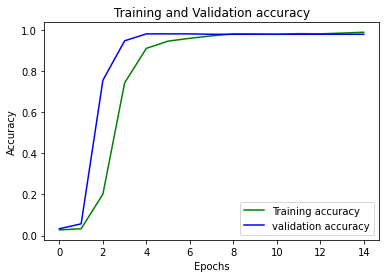

<Figure size 432x288 with 0 Axes>

In [29]:
acc_train1 = model_fit.history['accuracy']
acc_val1 = model_fit.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, acc_train1, 'g', label='Training accuracy')
plt.plot(epochs, acc_val1, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')

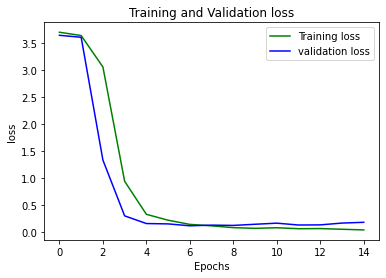

In [31]:
loss_train1 = model_fit.history['loss']
loss_val1 = model_fit.history['val_loss']
epochs = range(0,15)
plt.plot(epochs, loss_train1, 'g', label='Training loss')
plt.plot(epochs, loss_val1, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()